MACHINE LEARNING - REGRESSÃO LINEAR

Nosso objetivo é construir um modelo de machine learning que seja capaz de realizar previsões acerca de estimativas salarais em milhares de dólares. A variável a ser prevista é um valor numérico que representa a estimativa salarial, e a variável a ser tratada e analisada é a experiência laboral em meses, em suma, são apenas essas duas, haja vista que o dataset só possui essas duas colunas.

In [1]:
# Carregando as bibliotecas Python

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
warnings.filterwarnings("ignore", category = DeprecationWarning)
%matplotlib inline

In [2]:
df = pd.read_csv("Experience-Salary.csv")

In [3]:
df.head(5)

,exp(in months),salary(in thousands)
0,18.290293,16.521825
1,17.023407,11.666234
2,26.343613,23.167255
3,19.105834,20.877145
4,27.742516,23.166236


In [4]:
valor_medio_esperado_na_previsao = df['exp(in months)'].mean()

In [5]:
valor_medio_esperado_na_previsao

26.15782467853106

In [6]:
valor_medio_esperado_na_previsao1 = df['salary(in thousands)'].mean()

In [7]:
valor_medio_esperado_na_previsao1

26.722597279127935

In [8]:
# Calculando (simulando) o SSE
# O SSE é a diferença ao quadrado entre o valor previsto e o valor observado.
# Considerando que o valor previsto seja igual a média, podemos considerar que
# y = média da variável target (valores observados).

# Estamos apenas simulando o SSE, uma vez que a regressão ainda não foi criada e os valores previstos
# ainda não foram calculados.

squared_errors = pd.Series(valor_medio_esperado_na_previsao1 - df['salary(in thousands)'])**2
SSE = np.sum(squared_errors)
print ('Soma dos Quadrados dos Erros (SSE): %01.f' % SSE)

Soma dos Quadrados dos Erros (SSE): 78152


<function matplotlib.pyplot.show(close=None, block=None)>

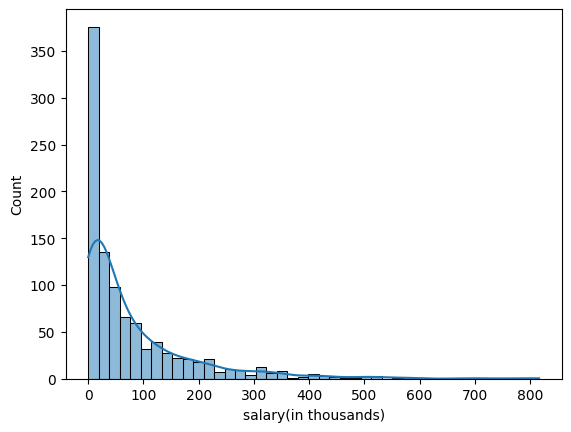

In [9]:
import seaborn as sns

sns.histplot(data = squared_errors, kde = True)
plt.show

In [10]:
# Função para calcular o desvio padrão
def calc_desvio_padrao(variavel, vies = 0):
    observacoes = float(len(variavel))
    return np.sqrt(np.sum((variavel - np.mean(variavel))**2) / (observacoes - min(vies, 1)))

In [11]:
print ('Resultado da Função: %0.5f Resultado do Numpy: %0.5f' % (calc_desvio_padrao(df['salary(in thousands)']), np.std(df['salary(in thousands)'])))

Resultado da Função: 8.84034 Resultado do Numpy: 8.84034


In [12]:
print ('Resultado da Função: %0.5f Resultado do Numpy: %0.5f' % (calc_desvio_padrao(df['exp(in months)']), np.std(df['exp(in months)'])))

Resultado da Função: 8.71273 Resultado do Numpy: 8.71273


In [13]:
def covariance(variavel_1, variavel_2, vies = 0):
    observacoes = float(len(variavel_1))
    return np.sum((variavel_1 - np.mean(variavel_1)) * (variavel_2 - np.mean(variavel_2))) / (observacoes - min(vies,1))

def standardize(variavel):
    return (variavel - np.mean(variavel)) / np.std(variavel)

def correlation(var1, var2, vies = 0):
    return covariance(standardize(var1), standardize(var2), vies)

In [14]:
from scipy.stats.stats import pearsonr
print ('Nossa estimativa de Correlação: %0.5f' % (correlation(df['exp(in months)'], df['salary(in thousands)'])))
print ('Correlação a partir da função pearsonr do SciPy: %0.5f' % pearsonr(df['exp(in months)'], df['salary(in thousands)'])[0])

Nossa estimativa de Correlação: 0.81097
Correlação a partir da função pearsonr do SciPy: 0.81097


In [15]:
x_range = [df['exp(in months)'].min(), df['exp(in months)'].max()]
y_range = [df['salary(in thousands)'].min(), df['salary(in thousands)'].max()]

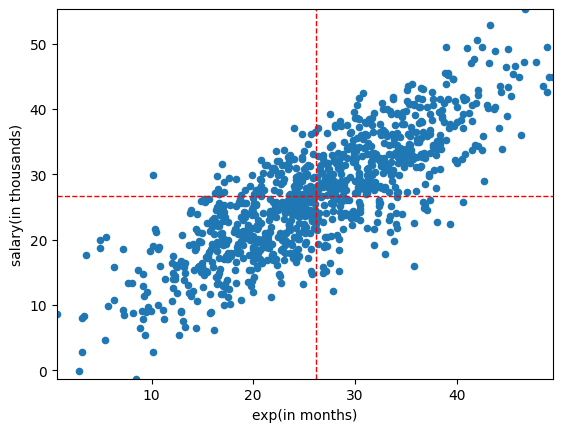

In [16]:
scatter_plot = df.plot(kind = 'scatter', x = 'exp(in months)', y = 'salary(in thousands)', xlim = x_range, ylim = y_range)

# Cálculo da média
meanY = scatter_plot.plot(x_range, [df['salary(in thousands)'].mean(),df['salary(in thousands)'].mean()], '--', color = 'red', linewidth = 1)
meanX = scatter_plot.plot([df['exp(in months)'].mean(), df['exp(in months)'].mean()], y_range, '--', color = 'red', linewidth = 1)

REGRESSÃO LINEAR COM O STATSMODELS


In [17]:
import statsmodels.api as sm

In [18]:
y = df['salary(in thousands)']
X = df['exp(in months)']

In [19]:
X = sm.add_constant(X)

In [20]:
X.head()

,const,exp(in months)
0,1.0,18.290293
1,1.0,17.023407
2,1.0,26.343613
3,1.0,19.105834
4,1.0,27.742516


In [21]:
modelo = sm.OLS(y, X)

modelo_v1 = modelo.fit()

In [22]:
print(modelo_v1.summary())

                             OLS Regression Results                             
Dep. Variable:     salary(in thousands)   R-squared:                       0.658
Model:                              OLS   Adj. R-squared:                  0.657
Method:                   Least Squares   F-statistic:                     1917.
Date:                  Sun, 05 Nov 2023   Prob (F-statistic):          1.51e-234
Time:                          19:17:18   Log-Likelihood:                -3062.3
No. Observations:                  1000   AIC:                             6129.
Df Residuals:                       998   BIC:                             6138.
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              5.198

In [23]:
print(modelo_v1.params)

const             5.198719
exp(in months)    0.822847
dtype: float64


In [24]:
valores_previstos = modelo_v1.predict(X)
valores_previstos

0      20.248825
1      19.206372
2      26.875473
3      20.919890
4      28.026556
         ...    
995    23.434433
996    31.749098
997    19.219227
998    25.952659
999    18.708238
Length: 1000, dtype: float64

In [25]:
exp = 30
Xp = np.array([1, exp])
print("Se a experiência trabalhista em meses é igual a %d, nosso modelo prevê que a mediana de salário em milhares de dólares é igual a %.01f" % (exp, modelo_v1.predict(Xp)))

Se a experiência trabalhista em meses é igual a 30, nosso modelo prevê que a mediana de salário em milhares de dólares é igual a 29.9


GERANDO UM SCATTERPLOT COM A LINHA DE REGRESSÃO

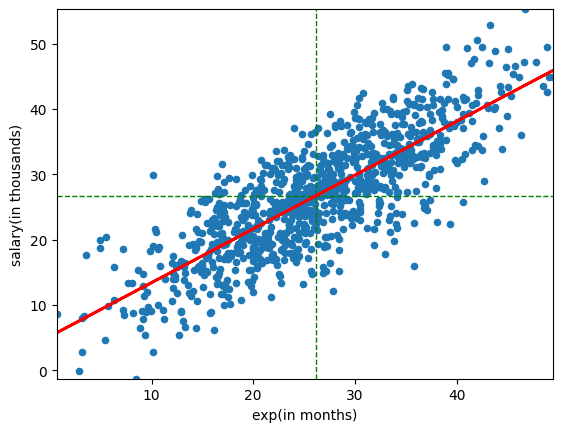

In [26]:
# Primeira camada do Scatter Plot
scatter_plot = df.plot(kind = 'scatter', x = 'exp(in months)', y = 'salary(in thousands)', xlim = x_range, ylim = y_range)

# Segunda camada do Scatter Plot (médias)
meanY = scatter_plot.plot(x_range, [df['salary(in thousands)'].mean(),df['salary(in thousands)'].mean()], '--', color = 'green', linewidth = 1)
meanX = scatter_plot.plot([df['exp(in months)'].mean(),df['exp(in months)'].mean()], y_range, '--', color = 'green', linewidth = 1)

# Terceira camada do Scatter Plot (linha de regressão)
regression_line = scatter_plot.plot(df['exp(in months)'], valores_previstos, '-', color = 'red', linewidth = 2)

In [29]:
#Gerando os resíduos
residuos = df['salary(in thousands)'] - valores_previstos
residuos_normalizados = standardize(residuos)

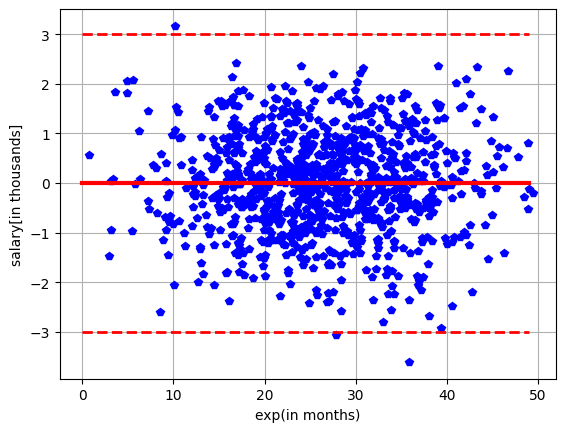

In [28]:
#Gerando um scatterplot dos resíduos
residual_scatter_plot = plt.plot(df['exp(in months)'], residuos_normalizados, 'bp')
plt.xlabel('exp(in months)')
plt.ylabel('salary[in thousands]')
mean_residual = plt.plot([int(x_range[0]),round(x_range[1],0)], [0,0], '-', color = 'red', linewidth = 3)
upper_bound = plt.plot([int(x_range[0]),round(x_range[1],0)], [3,3], '--', color = 'red', linewidth = 2)
lower_bound = plt.plot([int(x_range[0]),round(x_range[1],0)], [-3,-3], '--', color = 'red', linewidth = 2)
plt.grid()



REGRESSÃO LINEAR COM SKICIT-LEARN


In [30]:
from sklearn import linear_model

In [32]:
modelo_v2 = linear_model.LinearRegression(fit_intercept = True)

In [33]:
#Define os valores de x e y
num_observ = len(df)
X = df['exp(in months)'].values.reshape((num_observ, 1)) #X deve ser um vetor bidimensional
y = df['salary(in thousands)'].values  #y pode ser um vetor unidimensional

In [34]:
type(X)

numpy.ndarray

In [35]:
#Número de dimensões da matriz
np.ndim(X)

2

In [36]:
print(X)

[[18.29029332]
 [17.02340669]
 [26.34361348]
 [19.10583387]
 [27.74251647]
 [31.67117131]
 [14.18639863]
 [29.932845  ]
 [32.84132735]
 [26.87386911]
 [41.51380791]
 [32.20117764]
 [34.73822584]
 [27.51493135]
 [25.76125817]
 [36.92531809]
 [23.7470025 ]
 [24.09348782]
 [16.13380215]
 [23.252563  ]
 [25.63058204]
 [27.59918582]
 [22.92110427]
 [20.05168098]
 [24.98304725]
 [33.91865279]
 [44.45485384]
 [19.58633061]
 [18.51115733]
 [31.54165401]
 [31.71843486]
 [18.32610619]
 [21.34802336]
 [26.91006992]
 [34.93973987]
 [27.33055795]
 [21.36414187]
 [29.78202486]
 [15.74794461]
 [14.39682659]
 [28.50094976]
 [21.88009726]
 [10.59131485]
 [17.12255632]
 [36.48815058]
 [19.5314334 ]
 [34.00288198]
 [43.27144687]
 [20.47647992]
 [ 4.93608379]
 [21.17397468]
 [34.39341812]
 [27.06220405]
 [33.72339535]
 [28.63074094]
 [25.31227406]
 [27.33759393]
 [18.6145    ]
 [31.87655812]
 [34.60896563]
 [17.06008698]
 [25.74391561]
 [34.15232257]
 [20.95214793]
 [12.01485032]
 [12.40825677]
 [29.33854

In [37]:
type(y)

numpy.ndarray

In [38]:
np.ndim(y)

1

In [39]:
print(y)

[16.52182491 11.66623372 23.16725455 20.87714542 23.16623569 32.96625076
 15.29416954 33.15946113 32.0326529  32.34778358 38.24687556 22.77360262
 39.55484071 26.92287021 28.11647711 32.53300295 26.04333166 24.08604097
 20.91991068 21.04163596 25.71871117 25.59144379 28.90651651 18.3044055
 22.23621025 35.84581749 33.88003752 15.42500761 17.93958494 34.29649187
 33.22816701 29.33940107 16.87796087 25.28793949 33.34363003 29.71901605
 31.50346438 31.89158173 11.76671344 18.72605029 25.14671577 30.95664408
 18.59792877 17.09070229 43.24708198 21.84910721 22.44163536 52.85914566
 22.13167953 18.68699002 31.48749514 35.6672927  29.23848608 41.5408647
 32.67293143 30.08146509 28.44371365 25.83807529 39.44702366 32.15241704
 12.94952236 14.74157643 26.54923556 24.06077464 10.64228012 15.93890415
 33.86065242 28.9229164  20.34495438  8.48335856 24.86820448 16.70901159
 44.89163582 11.37236537 20.76729237 20.92695442 19.32875796 22.61337303
 20.11548744 33.93440549 39.62552727 31.03146072 25.7

In [40]:
#Treinamento do modelo
modelo_v2.fit(X,y)

LinearRegression()

In [43]:
#Impressão dos coeficientes
print(modelo_v2.coef_)
print(modelo_v2.intercept_)

[0.82284666]
5.1987185649885745


In [44]:
print(modelo_v2.predict(X))

[20.24882536 19.20637193 26.87547297 20.91989019 28.02655563 31.25923615
 16.87194932 29.82886015 32.22209514 27.31179205 39.35821682 31.69535009
 33.78295173 27.83928797 26.39628385 35.58259329 24.73886029 25.02396459
 18.4743638  24.33201241 26.28875744 27.90861648 24.05927269 21.69817732
 25.75593559 33.10856878 41.77824664 21.31526532 20.43056258 31.15266327
 31.2981268  20.27829386 22.76486832 27.34157976 33.94876688 27.68757694
 22.77813139 29.7047583  18.15686222 17.04509927 28.65062993 23.20268355
 13.91374664 19.28795687 35.22287146 21.27009334 33.17787649 40.80448417
 22.04772171  9.26035863 22.62165295 33.49922785 27.46676283 32.94790185
 28.75742817 26.02683878 27.69336647 20.51559775 31.428238   33.6765904
 19.23655418 26.38201358 33.30084318 22.43912354 15.08509804 15.40881122
 29.33984144 30.87625561 24.91801287 11.20941814 35.4890809  21.62446189
 43.17703473 16.64608052 28.41896296 18.93530248 25.81473084 22.13930298
 25.25368356 34.02930139 36.65523438 30.95945641 28.

In [46]:
#Realizando previsões com o modelo treinado
preditora = 30
Xp = np.array(preditora).reshape(-1, 1)
print("Para uma expectativa laboral de %d meses, nosso modelo prevê que a mediana de extimativa salarial será de %0.1f.\n" % (preditora, modelo_v2.predict(Xp)))

Para uma expectativa laboral de 30 meses, nosso modelo prevê que a mediana de extimativa salarial será de 29.9.



REALIZANDO COMPARAÇÕES ENTRE OS TEMPOS DE EXECUÇÃO DOS MODELOS: STATSMODELS X SKICIT-LEARN

In [47]:
from sklearn.datasets import make_regression
HX, Hy = make_regression(n_samples = 100000000, n_features = 1, n_targets = 1, random_state = 101)

In [49]:
%%time
sk_linear_regression = linear_model.LinearRegression( fit_intercept=True)
sk_linear_regression.fit(HX,Hy)

CPU times: user 2.81 s, sys: 2.74 s, total: 5.55 s
Wall time: 6.07 s


LinearRegression()

In [50]:
%%time
sm_linear_regression = sm.OLS(Hy, sm.add_constant(HX))
sm_linear_regression.fit()

CPU times: user 12.4 s, sys: 3.14 s, total: 15.6 s
Wall time: 14.7 s
